# How Fear to supernatural punishment facilitates the evolution of cooperation and  maintenance of natural resource


## Basic model: considering only the evolution of coopeartion
We consider the public good game with enviornmental feedback;
coopeartion is limitign the expolitation of nature (or conservation of it), while cheating is the selfish explitation of nature.
The benefit of individuals depend on the abundanc of nature and strategy.


In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import scipy
from scipy.integrate import solve_ivp

N=100 # total number of individuals in the community
K=100 # maximum abundance of natural resoruce

def Payoff_cooperator(R, a, w):
    # R abundance of natural resource
    # a explotation of cooperator 
    # w form of function (concave, lenear, or convex)
    return (a*R)**w

def Payoff_cheater(R, a, b, w, p, u):
     # R abundance of natural resource
     # a explotation of cooperator 
     # b additional explotation as a cheater
     # w form of function (concave, lenear, or convex)
    return ((a+b)*R)**w - Punishment(R, p, u)

def Punishment(R, p, u):
    # fear of punishment from supernatural
    return (p*R)**u

def ODE_replicator(t, x, epsilon, a, b, w, p, mu, u):
    #coop=x[0] # fraction of cooperator
    #R=x[1] # abundance of natural resource
    dxdt=np.zeros([2])
    # epsilon relative rate of evolution
    dxdt[0]=x[0]*(1-x[0])*(Payoff_cooperator(x[1], a, w)-Payoff_cheater(x[1], a, b, w, p, u))/epsilon
    dxdt[1]= mu*x[1]*(1-x[1]/K)-(a+b*(1-x[0]))*N*x[1]
    return dxdt
                   
    

sys.version


'3.11.5 (main, Sep 11 2023, 08:31:25) [Clang 14.0.6 ]'

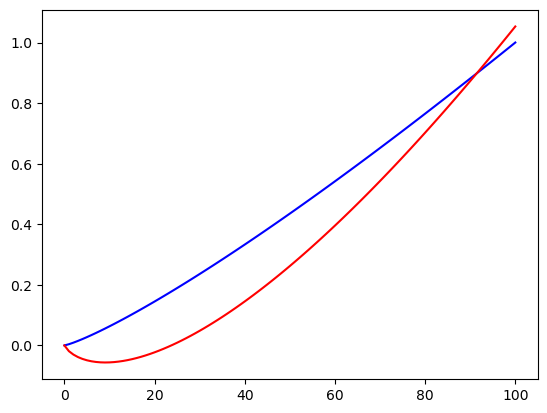

In [29]:
r=np.linspace(0,K, 101)
epsilon=1
a=0.01 
b=0.015
w=1.2
p=0.021
mu=3
u=0.9
Coop=Payoff_cooperator(r, a, w)
Cheat=Payoff_cheater(r, a, b, w, p, u)
plt.plot(r, Coop, color='blue')
plt.plot(r, Cheat, color='red')

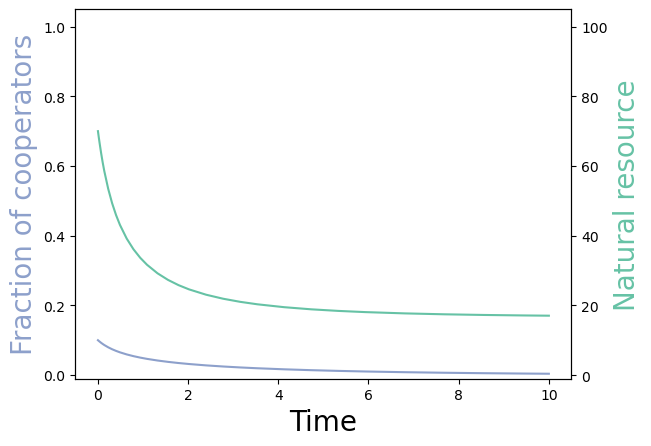

In [30]:
# Example without punishment
init=[0.1, 0.7*K]
t_span=[0, 10]
sol = solve_ivp( ODE_replicator, t_span,
               init, args=(epsilon, a, b, w, 0, mu,u), method='LSODA')

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='Fraction of cooperators', color='#8da0cb')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Fraction of cooperators', color='#8da0cb', fontsize=20) 
ax2.plot(sol.t, sol.y[1, :], label='Natural resource', color='#66c2a5')
ax2.set_ylim(-1, 105)
ax2.set_ylabel('Natural resource', color='#66c2a5', fontsize=20) 
plt.savefig("Example_without_punishment.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

/var/folders/dh/78v84wzs21j6_66l382rrsg00000gn/T/ipykernel_4068/152954637.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dxdt[0]=x[0]*(1-x[0])*(Payoff_cooperator(x[1], a, w)-Payoff_cheater(x[1], a, b, w, p, u))/epsilon


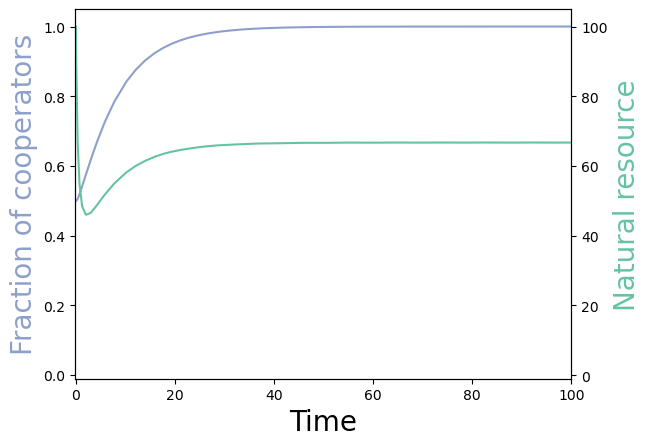

In [144]:
#Punishment facilitate the evolution of cooperation
init=[0.5, K]
t_span=[0, 100]
sol = solve_ivp( ODE_replicator, t_span,
               init, args=(epsilon, a, b, w, p, mu,u), method='RK45')

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='Fraction of cooperators', color='#8da0cb')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlim(-0.1, 100)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Fraction of cooperators', color='#8da0cb', fontsize=20) 
ax2.plot(sol.t, sol.y[1, :], label='Natural resource', color='#66c2a5')
ax2.set_ylim(-1, 105)
ax2.set_ylabel('Natural resource', color='#66c2a5', fontsize=20) 
plt.savefig("Example_with_punishment.png",bbox_inches="tight", pad_inches=0.01)
plt.show()

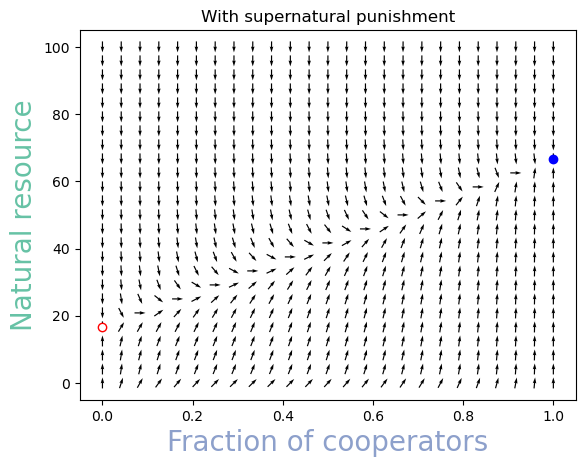

In [160]:
# Plotting the directions in the phase plane

def dX_dt(x, epsilon=0.5, a=0.001, b=0.01, w=1.2, p=0.02, mu=1.2, u=2):
    
    N=100 # total number of individuals in the community
    K=100 # maximum abundance of natural resoruce

    return np.array([x[0]*(1-x[0])*(Payoff_cooperator(x[1], a, w)-Payoff_cheater(x[1], a, b ,w, p, u))/epsilon, 
                    mu*x[1]*(1-x[1]/K)-(a+b*(1-x[0]))*N*x[1]])
#grid
x=np.linspace(0.0, 1, 25)
y=np.linspace(0.01, 100, 25)
X1, Y1=np.meshgrid(x, y)
DX1, DY1 = dX_dt([X1, Y1], epsilon, a,b,
w,p,mu,u) 
# calculate the direcitons
M = (np.hypot(DX1, DY1/100))   
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX2 =DX1/M                                        # Normalize each arrows
DY2 = DY1/M
plt.quiver(X1, Y1, DX2*100, DY2, pivot='mid') # note the diff in scales between x and y
plt.xlabel('Fraction of cooperators', color='#8da0cb', fontsize=20) 
plt.ylabel('Natural resource', color='#66c2a5', fontsize=20) 
plt.plot(0, K*(1-(a+b)*N/mu), markeredgecolor='red', color='w', marker='o') # equilibrium of cheaters
plt.plot(1, K*(1-a*N/mu), color='blue', marker='o') # equilibrium of cooperators
plt.title('With supernatural punishment')
plt.savefig('Vector_with_punishment.png')

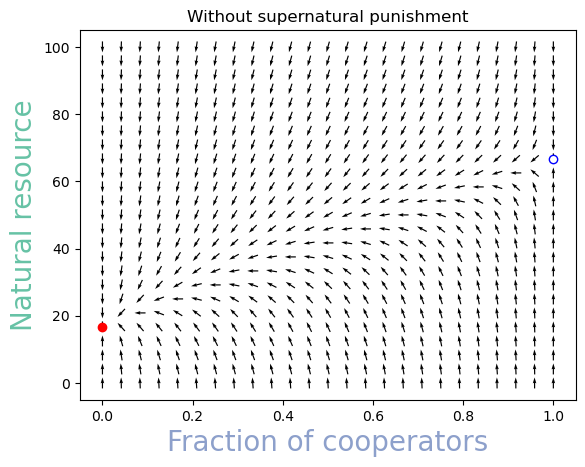

In [159]:
DX1, DY1 = dX_dt([X1, Y1], epsilon, a,b,
w,0,mu,u) 
# calculate the direcitons
M = (np.hypot(DX1, DY1/100))   
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX2 =DX1/M                                        # Normalize each arrows
DY2 = DY1/M
plt.quiver(X1, Y1, DX2*100, DY2, pivot='mid') # note the diff in scales between x and y
plt.xlabel('Fraction of cooperators', color='#8da0cb', fontsize=20) 
plt.ylabel('Natural resource', color='#66c2a5', fontsize=20) 
plt.plot(0, K*(1-(a+b)*N/mu), color='r', marker='o') # equilibrium of cheaters
plt.plot(1, K*(1-a*N/mu), markeredgecolor='blue', color='w', marker='o') # equilibrium of cooperators
plt.title('Without supernatural punishment')
plt.savefig('Vector_without_punishment.png')

In [18]:
print(scipy.version.version)

1.11.3


Coevolution of religion and cooperation.
Now we let the religion evolve.
Obviously, the payoff is the highest for Cheaters without belief.
Now we introduce the content bias that the transmission of religion regardless of the payoff.
Below, we slightly simplified the dynamics

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
def ODE_coevolve(t, x, epsilon, a, b, w, p, mu, u, v):
    
    dxdt=np.zeros([5]) 
    #dxdt[0] Cooperator with belief
    #dxdt[1] Cheater with belief
    #dxdt[2] Cooperator without beleif
    #dxdt[3] Cheater without belief
    #dxdt[4] Natural resource
    # epsilon relative rate of evolution
    # v represent the biased learing of religion
    
    # calculate payoff
    P=np.zeros([4])
    P[0]=(a*x[4])**w  # payoff of cooperative beleivers CB
    P[1]= (b*x[4])**w - (p*x[4])**u # payoff of slefish beleivers SB
    P[2]=P[0] # payoff of coopeartative non-beleivers CN
    P[3]=(b*x[4])**w # payyoff of selfish non-beleivers SN
    P_ave=np.dot(x[0:4], P) # average fitness
    dxdt[0]=(x[0]*(P[0]-P_ave)+v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[1]=(x[1]*(P[1]-P_ave)+v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[2]=(x[2]*(P[2]-P_ave)-v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[3]=(x[3]*(P[3]-P_ave)-v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[4]= mu*x[4]*(1-x[4]/K)-(a*(x[0]+x[2])+b*(x[1]+x[3]))*x[4]
    return dxdt

   Symbol    Values
2      P1  0.250000
0  Delta1  0.115889
4       v  0.075000
3      P2  0.040000
1  Delta2  0.024409


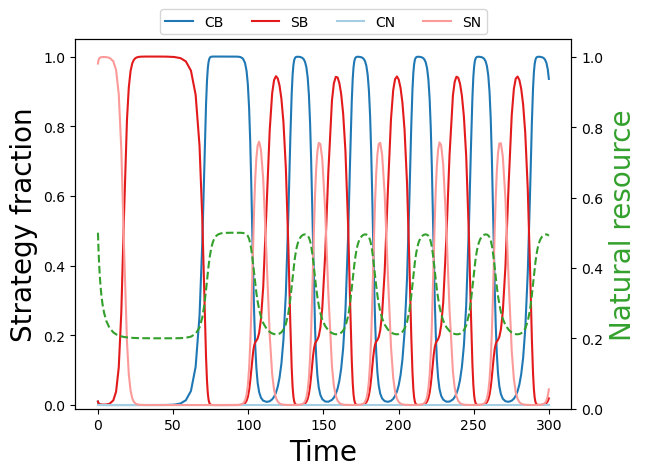

In [2]:
import pandas as pd
epsilon=0.05

a=0.5 #a<1 so that the effect of w and 
b=0.8 #b<1
w=1.7
p=1
mu=1
u=2
v=0.075# v could be a function of R
K=1

#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u

df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))

init=[0.01, 0.01, 0,0.98, 0.5*K]
t_span=[0, 300]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 

plt.savefig("Example_coevolution_cyclic.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

[0.6, 0.19999999999999996]
   Symbol  Values
2      P1    0.30
0  Delta1    0.24
4       v    0.20
3      P2    0.10
1  Delta2    0.08


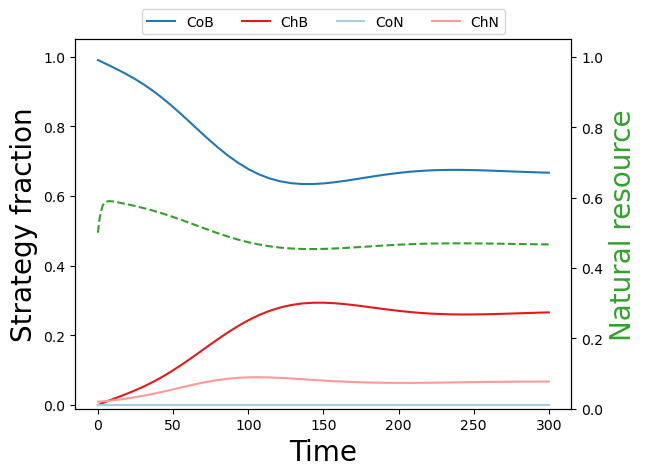

In [92]:
epsilon=1
a=0.4 #a<1 so that the effect of w and 
b=0.8 #b<1
w=1
p=0.5
mu=1
u=1
v=0.2# v could be a function of R
K=1

#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)
print([R1, R2])
Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u

df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))

init=[0.99, 0, 0.0, 0.01, 0.5*K]
t_span=[0, 300]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CoB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='ChB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CoN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='ChN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 

#plt.savefig("Example_coevolution_cyclic.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

In [96]:
epsilon=1
sol.y[:, -1]
x1=sol.y[0, -1]
x2=sol.y[1, -1]
r_eq=sol.y[-1, -1]
P=r_eq*p
D=(b-a)*r_eq
print(sol.y[:, -1])
print(mu-b-((D-P)/epsilon+a-b)*x1+P*D/epsilon)
print(-mu*r_eq/K*P*x1*(v-2*D)/(epsilon**2)+r_eq*(b-a)*P*r_eq*x1*x2/epsilon*(b-a-p))
print(P*x1*(v-2*D/epsilon**2)-mu*r_eq/K*(P*x2+D*x1)/epsilon-r_eq*(b-a)*x1*(-(1-x1)*(b-a)+x2*p)/epsilon)

[0.66671237 0.26590214 0.         0.06738548 0.4667654 ]
0.5413787647401781
0.012234073598122312
-0.11400617605300038


   Symbol  Values
2      P1  0.2500
0  Delta1  0.0975
4       v  0.0750
3      P2  0.0400
1  Delta2  0.0156


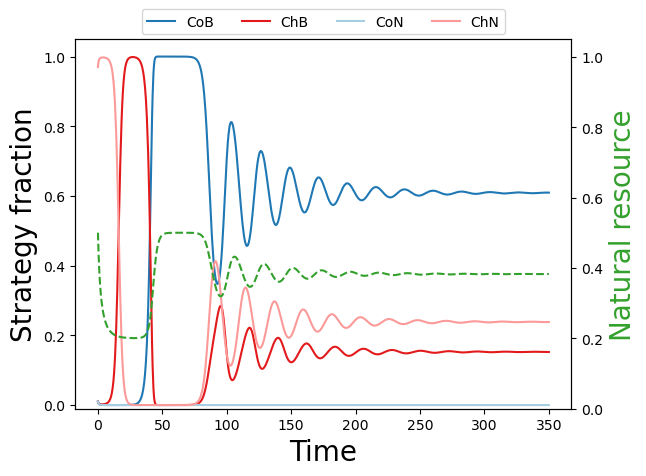

In [108]:
epsilon=0.05

a=0.5 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=1
mu=1
u=2
v=0.075 # v could be a function of R
K=1

init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 350]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='LSODA', rtol=10**(-4))
#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CoB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='ChB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CoN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='ChN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 
#plt.savefig("Example_coevolution_coexist.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

   Symbol  Values
2      P1  0.2500
4       v  0.1000
0  Delta1  0.0975
3      P2  0.0400
1  Delta2  0.0156


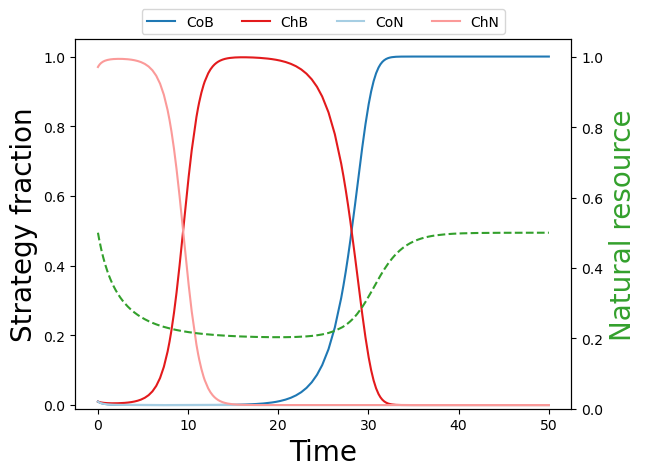

In [55]:
epsilon=0.05

a=0.5 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=1
mu=1
u=2
v=0.1# v could be a function of R
K=1


#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 50]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='LSODA', rtol=10**(-4))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CoB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='ChB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CoN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='ChN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 
plt.savefig("Example_coevolution_CoB.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

   Symbol  Values
0  Delta1  0.0448
4       v  0.0420
2      P1  0.0400
3      P2  0.0200
1  Delta2  0.0112


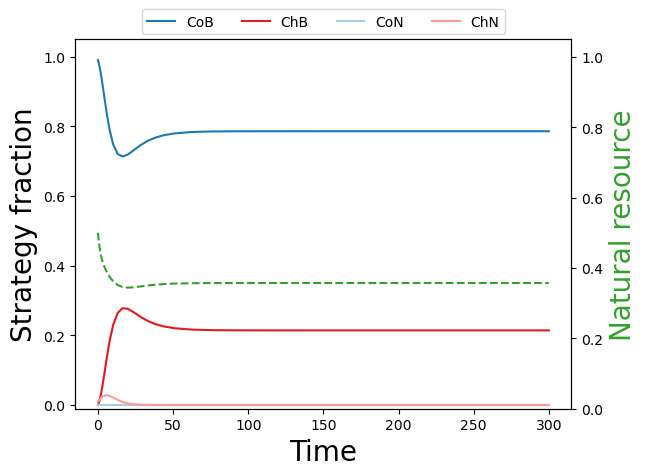

In [61]:
epsilon=0.05

a=0.6 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=0.1
mu=1
u=1
v=0.042# v could be a function of R
K=1


#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.99, 0.0, 0.0, 0.01, 0.5*K]
t_span=[0, 300]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-5))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CoB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='ChB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CoN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='ChN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 
plt.savefig("Example_coevolution_CoBChB.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

We can see various types of attractor, but the essence is 
1. ChB can invade the population oh ChN when the natural resource is scarce and/or supernatural punishment is not scarery.
2. CoB can invade the population of ChN when the natural resource is enough abundant and or the supernatural punishment is enough scarely
3. Whether ChN can invade the population of CoB depedns on the payoff difference and the attractiveness of religion ($v$)

In [ ]:
epsilon=0.05

a=0.5 #a<1 so that the effect of w and 
b=0.8 #b<1
w=1.7
p=1
mu=1
u=2
v=0.075 # v could be a function of R
K=1

init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 350]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='LSODA', rtol=10**(-4))

fig = plt.figure()

ax1 = fig.add_subplot(1, 1, 1) 
ax2 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CoB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='ChB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CoN', color='#a6cee3')
ax1.plot(sol.t, sol.y[3, :], label='ChN', color='#fb9a99')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('Time',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.plot(sol.t, sol.y[4, :], label='Natural resource', color='#33a02c', linestyle='dashed')
ax2.set_ylim(0, K*1.05)
ax2.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 

#plt.savefig("Example_coevolution_cyclic.png",bbox_inches="tight", pad_inches=0.011)
plt.show()

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1033673588544D+03   r2 =  0.6992018110169D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1033673588544D+03   r2 =  0.6992018110169D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1033673588544D+03   r2 =  0.6992018110169D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1033673588546D+03   r2 =  0.7029307759554D-14
 lsoda--  warning..internal t (=r1) 

capi_return is NULL
Call-back cb_f_in_lsoda__user__routines failed.
Fatal Python error: F2PySwapThreadLocalCallbackPtr: F2PySwapThreadLocalCallbackPtr: PyLong_AsVoidPtr failed
Python runtime state: initialized
Traceback (most recent call last):
  File "/Users/shotashibasaki/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ivp/base.py", line 154, in fun
    return self.fun_single(t, y)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shotashibasaki/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ivp/base.py", line 23, in fun_wrapped
    return np.asarray(fun(t, y), dtype=dtype)
                      ^^^^^^^^^
  File "/Users/shotashibasaki/anaconda3/lib/python3.11/site-packages/scipy/integrate/_ivp/ivp.py", line 540, in fun
    return fun(t, x, *args)
           ^^^^^^^^^^^^^^^^
KeyboardInterrupt


In [5]:
0.4**2-0.25**2

0.09750000000000003

In [21]:
sol.y[:, -1]

array([ 1.00000001e+00, -1.45498323e-12, -3.69493803e-37, -2.82549124e-12,
        5.00000006e-01])

In [15]:
0.16-0.25**2

0.0975

# Scenario 1: No enviornmental changes 

[0.3, 0.25, 0.11588886728657811]


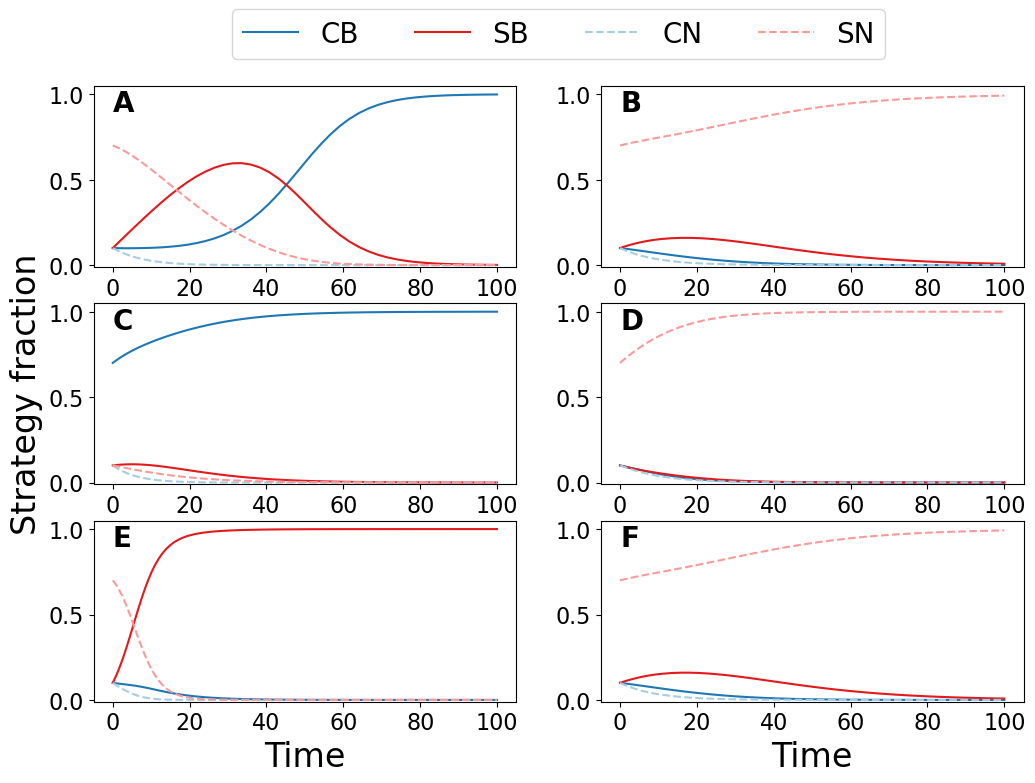

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
def ODE_NoEnv(t, x, epsilon, a, b, w, p,  u, v):
    
    dxdt=np.zeros([5]) 
    #dxdt[0] Cooperator with belief
    #dxdt[1] Cheater with belief
    #dxdt[2] Cooperator without beleif
    #dxdt[3] Cheater without belief
    #dxdt[4] Natural resource
    # epsilon relative rate of evolution
    # v represent the biased learing of religion
    
    # calculate payoff
    P=np.zeros([4])
    P[0]=(a*x[4])**w  # payoff of coopearotr with belief
    P[1]= (b*x[4])**w - (p*x[4])**u # payoff of cheater with beleif
    P[2]=P[0] # payoff of coopeartor without belief
    P[3]=(b*x[4])**w # payyoff of cheater with belief
    P_ave=np.dot(x[0:4], P) # average fitness
    dxdt[0]=(x[0]*(P[0]-P_ave)+v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[1]=(x[1]*(P[1]-P_ave)+v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[2]=(x[2]*(P[2]-P_ave)-v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[3]=(x[3]*(P[3]-P_ave)-v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[4]= 0
    return dxdt
epsilon=1
a=0.5 #a<1 so that the effect of w and 
b=0.8 #b<1
w=1.7
p=1
u=2
v=0.3 # v could be a function of R
K=1




init=[0.1, 0.1, 0.1,0.7, 0.5*K]

P=(init[4]*p)**u
delta=(init[4]*b)**w-(init[4]*a)**w
print([v, P, delta])
t_span=[0, 100]
sol1 = solve_ivp(ODE_NoEnv, t_span,
               init, args=(epsilon, a, b, w, p, u, v), 
                method='LSODA', rtol=10**(-4))
sol2 = solve_ivp(ODE_NoEnv, t_span,
               init, args=(epsilon, a, b, w, p, u, 0.1), 
                   method='LSODA', rtol=10**(-4))
                 
sol3 = solve_ivp(ODE_NoEnv, t_span,
               [0.7, 0.1, 0.1,0.1, 0.5*K], args=(epsilon, a, b, w, p, u, 0.2), 
                  method='LSODA', rtol=10**(-4))

sol4 = solve_ivp(ODE_NoEnv, t_span,
               init, args=(epsilon, a, b, w, p, u, 0.2), 
                  method='LSODA', rtol=10**(-4))

sol5 = solve_ivp(ODE_NoEnv, t_span,
               init, args=(epsilon, a, b, w, 0.1, u, v), 
                  method='LSODA', rtol=10**(-4))

sol6 = solve_ivp(ODE_NoEnv, t_span,
               init, args=(epsilon, a, b, w, 0.1, u, 0.1), 
                  method='LSODA', rtol=10**(-4))

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(3, 2, 1) 


ax1.plot(sol1.t, sol1.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax1.plot(sol1.t, sol1.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax1.plot(sol1.t, sol1.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax1.plot(sol1.t, sol1.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('',fontsize=0)
ax1.set_ylabel('', color='black', fontsize=0) 
ax1.xaxis.set_tick_params(labelsize=16)
ax1.yaxis.set_tick_params(labelsize=16)
ax1.text(x=0, y=0.9, s='A', fontsize=20, fontweight='bold')
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(1.1, 1.5),
           fontsize=20, ncol=4)


ax2=fig.add_subplot(3, 2, 2)


                
ax2.plot(sol4.t, sol4.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax2.plot(sol4.t, sol4.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax2.plot(sol4.t, sol4.y[2, :], label='CN', color='#a6cee3',  linestyle='dashed')
ax2.plot(sol4.t, sol4.y[3, :], label='SN', color='#fb9a99',  linestyle='dashed')
ax2.xaxis.set_tick_params(labelsize=16)
ax2.yaxis.set_tick_params(labelsize=16)
ax2.set_ylim(-0.0105, 1.05)
ax2.set_xlabel('',fontsize=0)
ax2.set_ylabel('', color='black', fontsize=0) 
ax2.text(x=0, y=0.9, s='B', fontsize=20, fontweight='bold')



ax3=fig.add_subplot(3, 2, 3)


ax3.plot(sol3.t, sol3.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax3.plot(sol3.t, sol3.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax3.plot(sol3.t, sol3.y[2, :], label='CN', color='#a6cee3',  linestyle='dashed')
ax3.plot(sol3.t, sol3.y[3, :], label='SN', color='#fb9a99',  linestyle='dashed')
ax3.set_ylim(-0.0105, 1.05)
ax3.xaxis.set_tick_params(labelsize=16)
ax3.yaxis.set_tick_params(labelsize=16)
ax3.set_xlabel('',fontsize=0)
ax3.set_ylabel('Strategy fraction', color='black', fontsize=24) 
ax3.text(x=0, y=0.9, s='C', fontsize=20, fontweight='bold')


ax4=fig.add_subplot(3, 2, 4)


ax4.plot(sol2.t, sol2.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax4.plot(sol2.t, sol2.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax4.plot(sol2.t, sol2.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax4.plot(sol2.t, sol2.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax4.set_ylim(-0.0105, 1.05)
ax4.xaxis.set_tick_params(labelsize=16)
ax4.yaxis.set_tick_params(labelsize=16)
ax4.set_xlabel('',fontsize=0)
ax4.set_ylabel('', color='black', fontsize=0) 
ax4.text(x=0, y=0.9, s='D', fontsize=20, fontweight='bold')




ax5=fig.add_subplot(3, 2, 5)


ax5.plot(sol5.t, sol5.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax5.plot(sol5.t, sol5.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax5.plot(sol5.t, sol5.y[2, :], label='CN', color='#a6cee3',  linestyle='dashed')
ax5.plot(sol5.t, sol5.y[3, :], label='SN', color='#fb9a99',  linestyle='dashed')
ax5.set_ylim(-0.0105, 1.05)
ax5.xaxis.set_tick_params(labelsize=16)
ax5.yaxis.set_tick_params(labelsize=16)
ax5.set_xlabel('Time',fontsize=24)
ax5.set_ylabel('', color='black', fontsize=0) 
ax5.text(x=0, y=0.9, s='E', fontsize=20, fontweight='bold')


ax6=fig.add_subplot(3, 2, 6)


ax6.plot(sol4.t, sol4.y[0, :], label='CB', color='#1f78b4', linestyle='solid')
ax6.plot(sol4.t, sol4.y[1, :], label='SB', color='#e31a1c', linestyle='solid')
ax6.plot(sol4.t, sol4.y[2, :], label='CN', color='#a6cee3',  linestyle='dashed')
ax6.plot(sol4.t, sol4.y[3, :], label='SN', color='#fb9a99',  linestyle='dashed')
ax6.set_ylim(-0.0105, 1.05)
ax6.xaxis.set_tick_params(labelsize=16)
ax6.yaxis.set_tick_params(labelsize=16)
ax6.set_xlabel('Time',fontsize=24)
ax6.set_ylabel('', color='black', fontsize=0) 
ax6.text(x=0, y=0.9, s='F', fontsize=20, fontweight='bold')

plt.savefig("Example_without_enviornment.pdf",bbox_inches="tight", pad_inches=0.015)
plt.show()

In [12]:
(0.4)**1.7-0.25**1.7


0.11588886728657811

## Examples in the linear case
### Drow phase space

[0.6, 0.19999999999999996]
   Symbol  Values
2      P1    0.30
0  Delta1    0.24
4       v    0.15
3      P2    0.10
1  Delta2    0.08


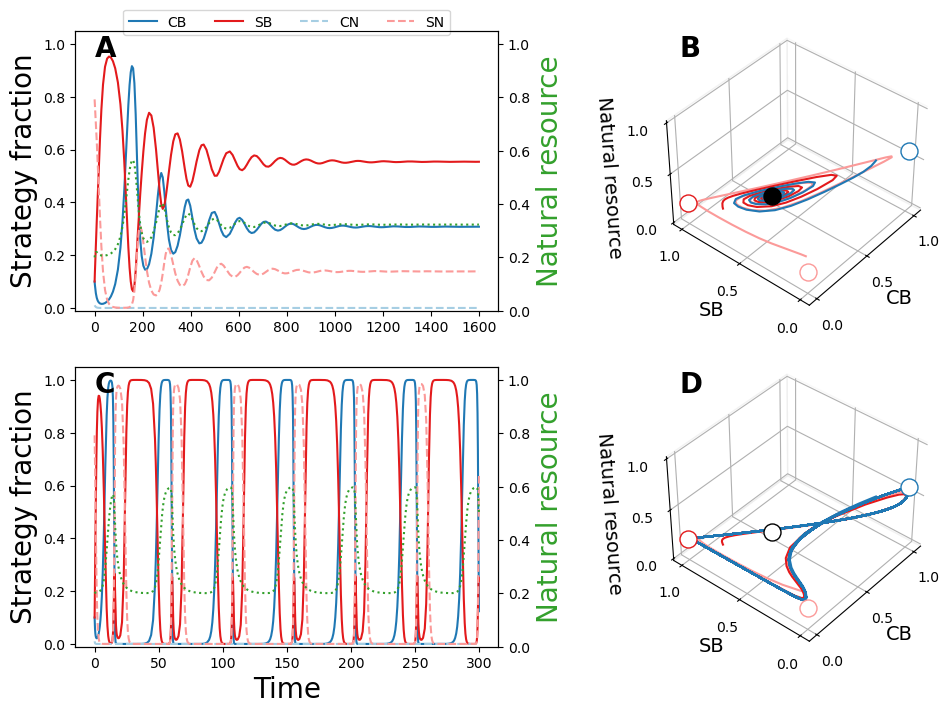

In [49]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D



def ODE_coevolve_simple(t, x, epsilon, a, b, w, p, mu, u, v):
    # We omit CoN
    dxdt=np.zeros([4]) 
    #dxdt[0] Cooperator with belief
    #dxdt[1] Cheater with belief
    #dxdt[2] Cheater without belief
    #dxdt[3] Natural resource
    # epsilon relative rate of evolution
    # v represent the biased learing of religion
    
    # calculate payoff
    P=np.zeros([3])
    P[0]=(a*x[3])**w  # payoff of coopearotr with belief
    P[1]= (b*x[3])**w - (p*x[3])**u # payoff of cheater with beleif
    P[2]=(b*x[3])**w # payyoff of cheater with belief
    P_ave=np.dot(x[0:3], P) # average fitness
    dxdt[0]=x[0]*(P[0]-P_ave)/epsilon
    dxdt[1]=(x[1]*(P[1]-P_ave)+v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[2]=(x[2]*(P[2]-P_ave)-v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[3]= mu*x[3]*(1-x[3]/K)-(a*x[0]+b*(1-x[0]))*x[3]
    return dxdt


def PlotPhase(x0, x1, R):

    fig = plt.figure(figsize = (8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("CoB", size = 14)
    ax.set_ylabel("ChB", size = 14)
    ax.set_zlabel("Natural resource", size = 14)
    
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_zticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.plot(x0, x1, R, color = "blue")

    plt.show()
    
# set parameter values

epsilon=0.03
epsilon0=0.5
a=0.4 #a<1 so that the effect of w and 
b=0.8 #b<1
w=1
p=0.5
mu=1
u=1
v=0.15# v could be a function of R
K=1

#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)
print([R1, R2])
Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u

df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))

init1=[0.1, 0.1,  0.01, 0.79, R2]
init2=[0.1, 0.79,  0.01, 0.1, R2]
init3=[0.79, 0.1,  0.01, 0.1, R1]
#init_=[0.01, 0.01,  0.01, 0.01, R1]
t_span=[0, 1500]

sol0 = solve_ivp(ODE_coevolve, [0, 1600],
               init1, args=(epsilon0, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4)) # converge to interior equilibrium
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2, 2, 1) 

ax12 = ax1.twinx()   

ax1.plot(sol0.t, sol0.y[0, :], label='CB', color='#1f78b4')
ax1.plot(sol0.t, sol0.y[1, :], label='SB', color='#e31a1c')
ax1.plot(sol0.t, sol0.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax1.plot(sol0.t, sol0.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax1.set_ylim(-0.0105, 1.05)
ax1.set_xlabel('',fontsize=20)
ax1.text(x=0, y=0.95, s='A', fontsize=20, fontweight='bold')
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax12.plot(sol0.t, sol0.y[4, :], label='Natural resource', color='#33a02c', linestyle='dotted')
ax12.set_ylim(0, K*1.05)
ax12.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 


sol02 = solve_ivp(ODE_coevolve, [0, 300],
               init1, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4)) # cyclic

ax2 = fig.add_subplot(2, 2, 3) 

ax22 = ax2.twinx()  

ax2.plot(sol02.t, sol02.y[0, :], label='CB', color='#1f78b4')
ax2.plot(sol02.t, sol02.y[1, :], label='SB', color='#e31a1c')
ax2.plot(sol02.t, sol02.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax2.plot(sol02.t, sol02.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax2.set_ylim(-0.0105, 1.05)
ax2.set_xlabel('Time',fontsize=20)
ax2.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax2.text(x=0, y=0.95, s='C', fontsize=20, fontweight='bold')
ax2.legend()
ax2.get_legend().remove()
ax22.plot(sol02.t, sol02.y[4, :], label='Natural resource', color='#33a02c', linestyle='dotted')
ax22.set_ylim(0, K*1.05)
ax22.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 

sol01 = solve_ivp(ODE_coevolve, t_span,
               init1, args=(epsilon0, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
sol02 = solve_ivp(ODE_coevolve, t_span,
               init2, args=(epsilon0, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
sol03 = solve_ivp(ODE_coevolve, t_span,
               init3, args=(epsilon0, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))

#sol_ = solve_ivp(ODE_coevolve, t_span,
#               init_, args=(epsilon, a, b, w, p, mu,u, v), 
#                method='RK45', rtol=10**(-4))


#dynamics from the oscilation



#PlotPhase(sol.y[0, :], sol.y[1, :], sol.y[3, :])
#fig = plt.figure(figsize = (8, 12))
ax3 = fig.add_subplot(2,2,2, projection='3d')
ax3.set_xlabel("CB", size = 14)
ax3.set_ylabel("SB", size = 14)
ax3.set_zlabel("Natural resource", size = 14)
    


#ax1.plot(sol4.y[0, :], sol4.y[1, :], sol4.y[-1, :],  color = "black", alpha=1)
ax3.plot(sol01.y[0, :], sol01.y[1, :], sol01.y[-1, :], color = '#fb9a99', alpha=1)
ax3.plot(sol02.y[0, :], sol02.y[1, :], sol02.y[-1, :], color = '#e31a1c', alpha=1)
ax3.plot(sol03.y[0, :], sol03.y[1, :], sol03.y[-1, :],  color = '#1f78b4', alpha=1)
#ax.plot(sol_.y[0, :], sol_.y[1, :], sol_.y[-1, :],  color = "orange", alpha=1)
#ax.plot(sol5.y[0, :], sol5.y[1, :], sol5.y[-1, :],  color = "black", alpha=0.7, linestyle='dotted')

# add equilibrium
ax3.scatter([sol0.y[0, -1]], [sol0.y[1, -1]], [sol0.y[-1, -1]], s=150, color='black',edgecolor='black')
ax3.scatter([1], [0], [R1], s=150, color='white',edgecolor='#1f78b4', alpha=1)
ax3.scatter([0], [1], [R2], s=150, color='white',edgecolor='#e31a1c', alpha=1)
ax3.scatter([0], [0], [R2], s=150, color='white',edgecolor='#fb9a99', alpha=1)

# First remove fill
ax3.xaxis.pane.fill = False
ax3.yaxis.pane.fill = False
ax3.zaxis.pane.fill = False
ax3.set_xticks([0, 0.5,  1.0])
ax3.set_yticks([0, 0.5,  1.0])
ax3.set_zticks([0, 0.5,  1.0])
ax3.view_init(40, 220)
ax3.text(x=0, y=1, z=1.6 , s='B', fontsize=20, fontweight='bold')


sol1 = solve_ivp(ODE_coevolve, t_span,
               init1, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
sol2 = solve_ivp(ODE_coevolve, t_span,
               init2, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
sol3 = solve_ivp(ODE_coevolve, t_span,
               init3, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
# dynamics from inner equilirbium,
init4=sol0.y[:, -1]
sol4 = solve_ivp(ODE_coevolve, t_span,
               init4, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))
ax4 = fig.add_subplot(2,2,4, projection='3d')
ax4.set_xlabel("CB", size = 14)
ax4.set_ylabel("SB", size = 14)
ax4.set_zlabel("Natural resource", size = 14)
    
ax4.plot(sol1.y[0, :], sol1.y[1, :], sol1.y[-1, :], color = '#fb9a99', alpha=1)
ax4.plot(sol2.y[0, :], sol2.y[1, :], sol2.y[-1, :], color = '#e31a1c', alpha=1)
ax4.plot(sol3.y[0, :], sol3.y[1, :], sol3.y[-1, :],  color = '#1f78b4', alpha=1)
#ax4.plot(sol4.y[0, :], sol4.y[1, :], sol4.y[-1, :],  color = "black", alpha=1, linestyle='dashed')
#ax.plot(sol_.y[0, :], sol_.y[1, :], sol_.y[-1, :],  color = "orange", alpha=1)
#ax2.plot(sol5.y[0, :], sol5.y[1, :], sol5.y[-1, :],  color = "black", alpha=0.7, linestyle='dotted')
# add equilibrium
ax4.scatter([sol0.y[0, -1]], [sol0.y[1, -1]], [sol0.y[-1, -1]], s=150, color='white',edgecolor='black')
ax4.scatter([1], [0], [R1], s=150, color='white',edgecolor='#1f78b4', alpha=1)
ax4.scatter([0], [1], [R2], s=150, color='white',edgecolor='#e31a1c', alpha=1)
ax4.scatter([0], [0], [R2], s=150, color='white',edgecolor='#fb9a99', alpha=1)

# First remove fill
ax4.xaxis.pane.fill = False
ax4.yaxis.pane.fill = False
ax4.zaxis.pane.fill = False
ax4.set_xticks([0, 0.5,  1.0])
ax4.set_yticks([0, 0.5, 1.0])
ax4.set_zticks([0, 0.5, 1.0])
ax4.view_init(40, 220)
ax4.text(x=0, y=1, z=1.6 , s='D', fontsize=20, fontweight='bold')
plt.savefig('Phase_space_3d_epsilon.pdf', bbox_inches="tight", pad_inches=0.015)

   Symbol  Values
2      P1  0.1600
4       v  0.1000
0  Delta1  0.0448
3      P2  0.0400
1  Delta2  0.0112
   Symbol  Values
0  Delta1  0.0448
1  Delta2  0.0112
4       v  0.0100
2      P1  0.0080
3      P2  0.0040
   Symbol  Values
2      P1  0.4000
3      P2  0.2000
0  Delta1  0.0448
1  Delta2  0.0112
4       v  0.0100
   Symbol  Values
0  Delta1  0.0448
4       v  0.0420
2      P1  0.0400
3      P2  0.0200
1  Delta2  0.0112


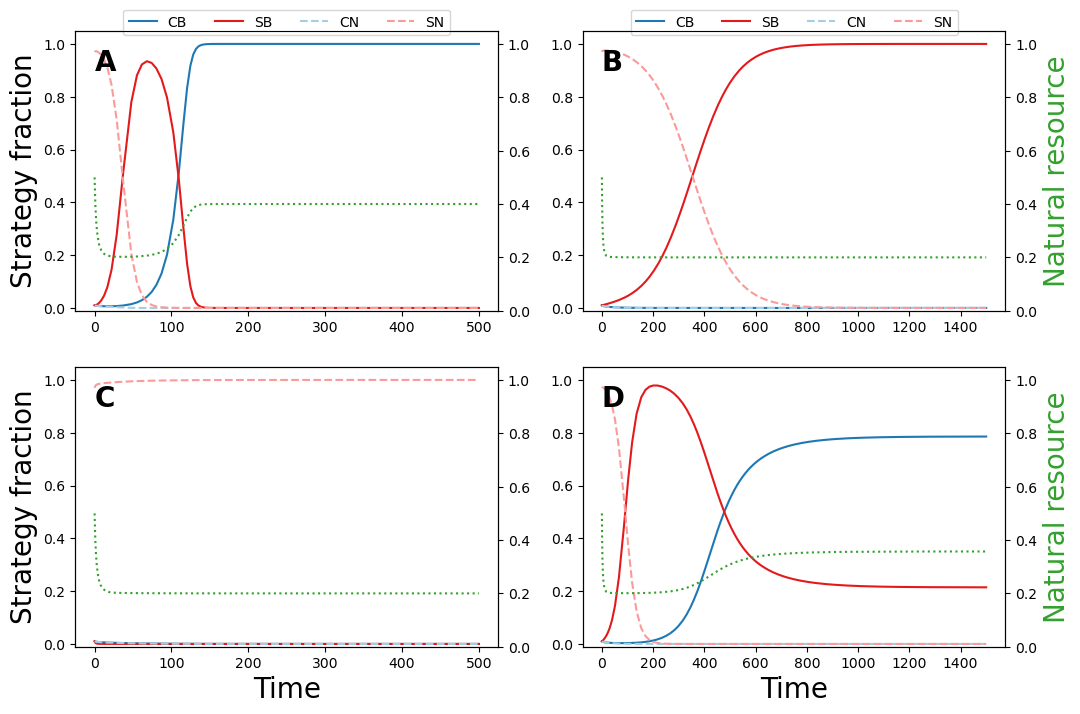

In [46]:
# Example of fixation  either of the three, and the coexistence of CB with SN

def ODE_coevolve(t, x, epsilon, a, b, w, p, mu, u, v):
    
    dxdt=np.zeros([5]) 
    #dxdt[0] Cooperator with belief
    #dxdt[1] Cheater with belief
    #dxdt[2] Cooperator without beleif
    #dxdt[3] Cheater without belief
    #dxdt[4] Natural resource
    # epsilon relative rate of evolution
    # v represent the biased learing of religion
    
    # calculate payoff
    P=np.zeros([4])
    P[0]=(a*x[4])**w  # payoff of cooperative beleivers CB
    P[1]= (b*x[4])**w - (p*x[4])**u # payoff of slefish beleivers SB
    P[2]=P[0] # payoff of coopeartative non-beleivers CN
    P[3]=(b*x[4])**w # payyoff of selfish non-beleivers SN
    P_ave=np.dot(x[0:4], P) # average fitness
    dxdt[0]=(x[0]*(P[0]-P_ave)+v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[1]=(x[1]*(P[1]-P_ave)+v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[2]=(x[2]*(P[2]-P_ave)-v*x[2]*(x[0]+x[1]))/epsilon
    dxdt[3]=(x[3]*(P[3]-P_ave)-v*x[3]*(x[0]+x[1]))/epsilon
    dxdt[4]= mu*x[4]*(1-x[4]/K)-(a*(x[0]+x[2])+b*(x[1]+x[3]))*x[4]
    return dxdt

#================CB fixed===================
epsilon=0.5

a=0.6 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=1
mu=1
u=2
v=0.1# v could be a function of R
K=1


#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 500]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                 method='RK45', rtol=10**(-4))

fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(2, 2, 1) 
ax12 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax1.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax1.set_ylim(-0.0105, 1.05)
ax1.text(x=0, y=0.9, s='A', fontsize=20, fontweight='bold')
ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax12.plot(sol.t, sol.y[4, :], label='Natural resource', 
          color='#33a02c', linestyle='dotted')
ax12.set_ylim(0, K*1.05)
#ax12.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 

#==========SB is fixed ============
epsilon=0.5

a=0.6 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=0.02
mu=1
u=1
v=0.01# v could be a function of R
K=1


#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 1500]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                 method='RK45', rtol=10**(-4))


ax2 = fig.add_subplot(2, 2, 2) 
ax22 = ax2.twinx()   #

ax2.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax2.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax2.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax2.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax2.set_ylim(-0.0105, 1.05)
ax2.set_xlabel('',fontsize=20)
ax2.set_ylabel('', color='black', fontsize=20) 
ax2.legend()
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax2.text(x=0, y=0.9, s='B', fontsize=20, fontweight='bold')
ax22.plot(sol.t, sol.y[4, :], label='Natural resource', 
          color='#33a02c', linestyle='dotted')
ax22.set_ylim(0, K*1.05)
ax22.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 


#==========SN is fixed ============
epsilon=0.5

a=0.6 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=1
mu=1
u=1
v=0.01# v could be a function of R
K=1


#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 500]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))


ax3 = fig.add_subplot(2, 2, 3) 
ax32 = ax3.twinx()   #

ax3.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax3.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax3.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax3.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax3.set_ylim(-0.0105, 1.05)
ax3.set_xlabel('Time',fontsize=20)
ax3.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax3.text(x=0, y=0.9, s='C', fontsize=20, fontweight='bold')
#ax3.legend()
#ax3.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
#ax2.get_legend().remove()
ax32.plot(sol.t, sol.y[4, :], label='Natural resource', 
          color='#33a02c', linestyle='dotted')
ax32.set_ylim(0, K*1.05)
#ax32.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 


#==========CN coexists with SN============
epsilon=0.5

a=0.6 #a<1 so that the effect of w and 
b=0.8 #b<1
w=2
p=0.1
mu=1
u=1
v=0.042# v could be a function of R
K=1



#Calculate lkey values
R1=K*(1-a/mu)
R2=K*(1-b/mu)

Delta1=(b**w-a**w)*R1**w
Delta2=(b**w-a**w)*R2**w
P1=(p*R1)**u
P2=(p*R2)**u
df_key=pd.DataFrame({"Symbol":["Delta1", "Delta2",  "P1", "P2", "v"],
                    "Values":[Delta1, Delta2, P1, P2, v]})
print(df_key.sort_values("Values", ascending=False))


init=[0.01, 0.01, 0.01,0.97, 0.5*K]
t_span=[0, 1500]
sol = solve_ivp(ODE_coevolve, t_span,
               init, args=(epsilon, a, b, w, p, mu,u, v), 
                method='RK45', rtol=10**(-4))


ax4 = fig.add_subplot(2, 2, 4) 
ax42 = ax4.twinx()   #

ax4.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax4.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax4.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax4.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax4.set_ylim(-0.0105, 1.05)
ax4.set_xlabel('Time',fontsize=20)
ax4.set_ylabel('', color='black', fontsize=20) 
ax4.text(x=0, y=0.9, s='D', fontsize=20, fontweight='bold')
ax42.plot(sol.t, sol.y[4, :], label='Natural resource', 
          color='#33a02c', linestyle='dotted')
ax42.set_ylim(0, K*1.05)

ax42.set_ylabel('Natural resource', color='#33a02c', fontsize=20) 
plt.savefig('Examples_missionary.pdf', bbox_inches="tight", pad_inches=0.015)

# Full model
 COnsider both missionary and apostasy

In [308]:
def ODE_full(t, x, epsilon, a, b, w, p, mu, u, v1, v2):
    
    dxdt=np.zeros([5]) 
    #dxdt[0] Cooperator with belief
    #dxdt[1] Cheater with belief
    #dxdt[2] Cooperator without beleif
    #dxdt[3] Cheater without belief
    #dxdt[4] Natural resource
    # epsilon relative rate of evolution
    # v1 represent the missionary rate 
    # v2 represents the aposasy events
    
    # calculate payoff
    P=np.zeros([4])
    P[0]=(a*x[4])**w  # payoff of cooperative beleivers CB
    P[1]= (b*x[4])**w - (p*x[4])**u # payoff of slefish beleivers SB
    P[2]=P[0] # payoff of coopeartative non-beleivers CN
    P[3]=(b*x[4])**w # payyoff of selfish non-beleivers SN
    
    # normalization 
    x[0]=max(x[0], 0)
    x[1]=max(x[1], 0)
    x[2]=max(x[2], 0)
    x[3]=max(x[3], 0)
    x[0]=x[0]/sum(x[0:4])
    x[1]=x[1]/sum(x[0:4])
    x[2]=x[2]/sum(x[0:4])
    x[3]=x[3]/sum(x[0:4])
    
    P_ave=np.dot(x[0:4], P) # average fitness
    dxdt[0]=(x[0]*(P[0]-P_ave)+v1*x[2]*(x[0]+x[1])-v2*x[0]*(x[2]+x[3]))/epsilon
    dxdt[1]=(x[1]*(P[1]-P_ave)+v1*x[3]*(x[0]+x[1])-v2*x[1]*(x[2]+x[3]))/epsilon
    dxdt[2]=(x[2]*(P[2]-P_ave)-v1*x[2]*(x[0]+x[1])+v2*x[0]*(x[2]+x[3]))/epsilon
    dxdt[3]=(x[3]*(P[3]-P_ave)-v1*x[3]*(x[0]+x[1])+v2*x[1]*(x[2]+x[3]))/epsilon
    dxdt[4]= (mu*(1-x[4]/K)-a*(x[0]+x[2])-b*(1-x[0]-x[2]))*x[4]
    return dxdt

             
def State_decifer(x):
    # analyze the state
    threshold=0.0001
    state=(x>threshold)*1

    return(int(str(state[0])+str(state[1])+str(state[2])+str(state[3]), 2))
    
def Check_oscilation(x):
    cvs=[]
    threshold=0.0001
    for i in range(0,4):
        if np.mean(x[i, :])>threshold:
            cvs.append(np.std(x[i, :])/np.mean(x[i, :]))
        else:
            # mean fraction is too small and regarded as extinction
            cvs.append(0)
    # If the average of cv >0.1, we regard the attractor as an oscilation
    return((np.mean(cvs)>0.1)*1)

    

In [321]:

# Fixed parameter values
epsilon=0.5

b=0.8 #b<1
w=1
p=0.5
mu=1
u=1
v1=0.15
K=1
init1=[0.1, 0.1,  0.01, 0.79, 0.5]
Tf=1600
threshold=0.0001
step_size=100
v2_array=np.linspace(0, 0.1, 101)
a_array=np.linspace(0, 0.79, 80)

apostasy=[]
a_return=[]
state_list=[]
oscilate_list=[]
CB_list=[]
SB_list=[]
CN_list=[]
SN_list=[]
R_list=[]
for v2 in v2_array:
    for a in a_array:
        sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=init1, args=(epsilon, a, b, w, p, mu,u, v1, v2), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
        last100=sol.y[0:4, (-100*step_size):] # dynamics between Tf-100 to Tf
        R_list.append(np.mean(sol.y[4, (-100*step_size):]))
        apostasy.append(v2)
        a_return.append(a)
        state_list.append(State_decifer(np.mean(last100, 1)))
        oscilate_list.append(Check_oscilation(last100))
        CB_list.append((np.mean(last100[0,:])>threshold)*1)
        SB_list.append((np.mean(last100[1,:])>threshold)*1)
        CN_list.append((np.mean(last100[2,:])>threshold)*1)
        SN_list.append((np.mean(last100[3,:])>threshold)*1)

df=pd.DataFrame({"Apostasy":apostasy,
                "a":a_return,
                "State":state_list,
                "Oscilate":oscilate_list,
                "CB":CB_list,
                "SB":SB_list,
                "CN":CN_list,
                "SN":SN_list,
                "R":R_list})
        
df.to_csv('FullModel_parameter_sweep_w1_u1.csv', index=False)


(0.0, 1.05)

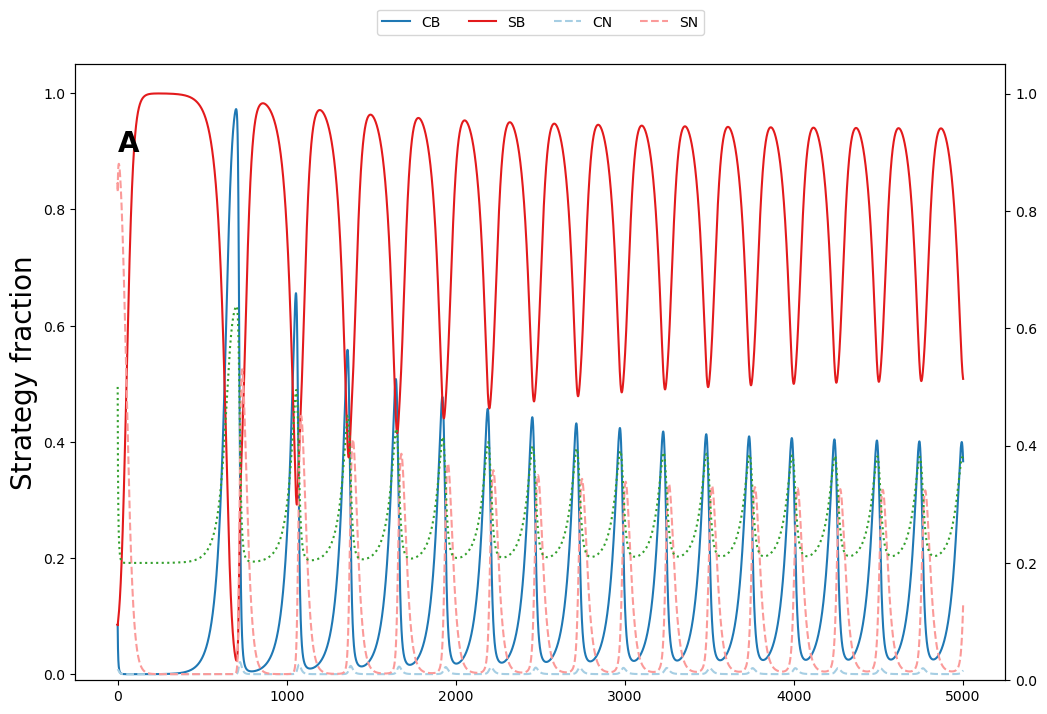

In [331]:
#Tesr
Tf=5000
sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=[0.1, 0.1, 0.01, 0.97, 0.5], args=(epsilon, 0.35, b, w, p, mu,u, v1, 0.025), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(1, 1, 1) 
ax12 = ax1.twinx()   #

ax1.plot(sol.t, sol.y[0, :], label='CB', color='#1f78b4')
ax1.plot(sol.t, sol.y[1, :], label='SB', color='#e31a1c')
ax1.plot(sol.t, sol.y[2, :], label='CN', color='#a6cee3', linestyle='dashed')
ax1.plot(sol.t, sol.y[3, :], label='SN', color='#fb9a99', linestyle='dashed')
ax1.set_ylim(-0.0105, 1.05)
ax1.text(x=0, y=0.9, s='A', fontsize=20, fontweight='bold')
ax1.set_xlabel('',fontsize=20)
ax1.set_ylabel('Strategy fraction', color='black', fontsize=20) 
ax1.legend()
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),ncol=4)
ax12.plot(sol.t, sol.y[4, :], label='Natural resource', 
          color='#33a02c', linestyle='dotted')
ax12.set_ylim(0, K*1.05)

In [333]:
#SI data

# Fixed parameter values
epsilon=0.5

b=0.8 #b<1
w=2
p=0.5
mu=1
u=1
v1=0.15
K=1
init1=[0.1, 0.1,  0.01, 0.79, 0.5]
Tf=1600
threshold=0.0001
step_size=100
v2_array=np.linspace(0, 0.1, 101)
a_array=np.linspace(0, 0.79, 80)

apostasy=[]
a_return=[]
state_list=[]
oscilate_list=[]
CB_list=[]
SB_list=[]
CN_list=[]
SN_list=[]
R_list=[]
for v2 in v2_array:
    for a in a_array:
        sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=init1, args=(epsilon, a, b, w, p, mu,u, v1, v2), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
        last100=sol.y[0:4, (-100*step_size):] # dynamics between Tf-100 to Tf
        R_list.append(np.mean(sol.y[4, (-100*step_size):]))
        apostasy.append(v2)
        a_return.append(a)
        state_list.append(State_decifer(np.mean(last100, 1)))
        oscilate_list.append(Check_oscilation(last100))
        CB_list.append((np.mean(last100[0,:])>threshold)*1)
        SB_list.append((np.mean(last100[1,:])>threshold)*1)
        CN_list.append((np.mean(last100[2,:])>threshold)*1)
        SN_list.append((np.mean(last100[3,:])>threshold)*1)

df=pd.DataFrame({"Apostasy":apostasy,
                "a":a_return,
                "State":state_list,
                "Oscilate":oscilate_list,
                "CB":CB_list,
                "SB":SB_list,
                "CN":CN_list,
                "SN":SN_list,
                "R":R_list})
        
df.to_csv('FullModel_parameter_sweep_w2_u1.csv', index=False)

In [334]:
#SI data

# Fixed parameter values
epsilon=0.5

b=0.8 #b<1
w=1
p=0.5
mu=1
u=2
v1=0.15
K=1
init1=[0.1, 0.1,  0.01, 0.79, 0.5]
Tf=1600
threshold=0.0001
step_size=100
v2_array=np.linspace(0, 0.1, 101)
a_array=np.linspace(0, 0.79, 80)

apostasy=[]
a_return=[]
state_list=[]
oscilate_list=[]
CB_list=[]
SB_list=[]
CN_list=[]
SN_list=[]
R_list=[]
for v2 in v2_array:
    for a in a_array:
        sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=init1, args=(epsilon, a, b, w, p, mu,u, v1, v2), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
        last100=sol.y[0:4, (-100*step_size):] # dynamics between Tf-100 to Tf
        R_list.append(np.mean(sol.y[4, (-100*step_size):]))
        apostasy.append(v2)
        a_return.append(a)
        state_list.append(State_decifer(np.mean(last100, 1)))
        oscilate_list.append(Check_oscilation(last100))
        CB_list.append((np.mean(last100[0,:])>threshold)*1)
        SB_list.append((np.mean(last100[1,:])>threshold)*1)
        CN_list.append((np.mean(last100[2,:])>threshold)*1)
        SN_list.append((np.mean(last100[3,:])>threshold)*1)

df=pd.DataFrame({"Apostasy":apostasy,
                "a":a_return,
                "State":state_list,
                "Oscilate":oscilate_list,
                "CB":CB_list,
                "SB":SB_list,
                "CN":CN_list,
                "SN":SN_list,
                "R":R_list})
        
df.to_csv('FullModel_parameter_sweep_w1_u2.csv', index=False)

In [335]:
#SI data

# Fixed parameter values
epsilon=0.5

b=0.8 #b<1
w=0.5
p=0.5
mu=1
u=1
v1=0.15
K=1
init1=[0.1, 0.1,  0.01, 0.79, 0.5]
Tf=1600
threshold=0.0001
step_size=100
v2_array=np.linspace(0, 0.1, 101)
a_array=np.linspace(0, 0.79, 80)

apostasy=[]
a_return=[]
state_list=[]
oscilate_list=[]
CB_list=[]
SB_list=[]
CN_list=[]
SN_list=[]
R_list=[]
for v2 in v2_array:
    for a in a_array:
        sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=init1, args=(epsilon, a, b, w, p, mu,u, v1, v2), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
        last100=sol.y[0:4, (-100*step_size):] # dynamics between Tf-100 to Tf
        R_list.append(np.mean(sol.y[4, (-100*step_size):]))
        apostasy.append(v2)
        a_return.append(a)
        state_list.append(State_decifer(np.mean(last100, 1)))
        oscilate_list.append(Check_oscilation(last100))
        CB_list.append((np.mean(last100[0,:])>threshold)*1)
        SB_list.append((np.mean(last100[1,:])>threshold)*1)
        CN_list.append((np.mean(last100[2,:])>threshold)*1)
        SN_list.append((np.mean(last100[3,:])>threshold)*1)

df=pd.DataFrame({"Apostasy":apostasy,
                "a":a_return,
                "State":state_list,
                "Oscilate":oscilate_list,
                "CB":CB_list,
                "SB":SB_list,
                "CN":CN_list,
                "SN":SN_list,
                "R":R_list})
        
df.to_csv('FullModel_parameter_sweep_w05_u1.csv', index=False)

/var/folders/dh/78v84wzs21j6_66l382rrsg00000gn/T/ipykernel_44037/1644744965.py:15: RuntimeWarning: invalid value encountered in scalar power
  P[0]=(a*x[4])**w  # payoff of cooperative beleivers CB
/var/folders/dh/78v84wzs21j6_66l382rrsg00000gn/T/ipykernel_44037/1644744965.py:16: RuntimeWarning: invalid value encountered in scalar power
  P[1]= (b*x[4])**w - (p*x[4])**u # payoff of slefish beleivers SB
/var/folders/dh/78v84wzs21j6_66l382rrsg00000gn/T/ipykernel_44037/1644744965.py:18: RuntimeWarning: invalid value encountered in scalar power
  P[3]=(b*x[4])**w # payyoff of selfish non-beleivers SN


In [336]:
#SI data

# Fixed parameter values
epsilon=0.5

b=0.8 #b<1
w=1
p=0.5
mu=1
u=0.5
v1=0.15
K=1
init1=[0.1, 0.1,  0.01, 0.79, 0.5]
Tf=1600
threshold=0.0001
step_size=100
v2_array=np.linspace(0, 0.1, 101)
a_array=np.linspace(0, 0.79, 80)

apostasy=[]
a_return=[]
state_list=[]
oscilate_list=[]
CB_list=[]
SB_list=[]
CN_list=[]
SN_list=[]
R_list=[]
for v2 in v2_array:
    for a in a_array:
        sol=solve_ivp(ODE_full, t_span=[0, Tf],t_eval=np.linspace(0, Tf, Tf*step_size+1),
                y0=init1, args=(epsilon, a, b, w, p, mu,u, v1, v2), 
                method='RK45', rtol=10**(-4)) # step size is fixed as 0.01
        last100=sol.y[0:4, (-100*step_size):] # dynamics between Tf-100 to Tf
        R_list.append(np.mean(sol.y[4, (-100*step_size):]))
        apostasy.append(v2)
        a_return.append(a)
        state_list.append(State_decifer(np.mean(last100, 1)))
        oscilate_list.append(Check_oscilation(last100))
        CB_list.append((np.mean(last100[0,:])>threshold)*1)
        SB_list.append((np.mean(last100[1,:])>threshold)*1)
        CN_list.append((np.mean(last100[2,:])>threshold)*1)
        SN_list.append((np.mean(last100[3,:])>threshold)*1)

df=pd.DataFrame({"Apostasy":apostasy,
                "a":a_return,
                "State":state_list,
                "Oscilate":oscilate_list,
                "CB":CB_list,
                "SB":SB_list,
                "CN":CN_list,
                "SN":SN_list,
                "R":R_list})
        
df.to_csv('FullModel_parameter_sweep_w1_u05.csv', index=False)

/var/folders/dh/78v84wzs21j6_66l382rrsg00000gn/T/ipykernel_44037/1644744965.py:16: RuntimeWarning: invalid value encountered in scalar power
  P[1]= (b*x[4])**w - (p*x[4])**u # payoff of slefish beleivers SB
